In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve, ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5), figsize=(10,8)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [31]:
def plot_roc_curve(title, labels, predictions, figsize=(10, 8)):
    
    fpr, tpr, thrsh = roc_curve(labels, predictions)
    roc_auc = roc_auc_score(labels, predictions)
    
    plt.figure(figsize=figsize)
    plt.grid()
    plt.plot(fpr, tpr, color='b', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} Receiver Operating Characteristic'.format(title))
    plt.legend()

In [5]:
def plot_train_val_error(x_train, y_train, model, step, split):
    
    sizes = np.arange(step, (1+step), step)
    training_scores = []
    val_scores = []
    
    for i in sizes:
        x_temp = x_train.sample(frac=i)
        y_temp = y_train.loc[x_temp.index]
        x_train_temp, x_val_temp, y_train_temp, y_val_temp = train_test_split(x_temp, y_temp, test_size=split, shuffle=True, random_state=24)
        model.fit(x_train_temp, y_train_temp)
        training_scores.append(1 - model.score(x_train_temp, y_train_temp))
        val_scores.append(1 - accuracy_score(model.predict(x_val_temp), y_val_temp))
        
    plt.figure(figsize=(16,12))
    plt.plot(sizes, training_scores, 'r', label='Training Error')
    plt.plot(sizes, val_scores, 'b', label='Validation Error')
    plt.legend()

In [7]:
pipe = Pipeline(steps=[
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        ('numeric', Pipeline(steps=[
            ('selector', TypeSelector(np.number)),
            ('scaler', StandardScaler())
        ])),
        ('hour', Pipeline(steps=[
            ('selector', HourOfDaySelector()),
            ('encoder', CategoricalTransformer(24))
        ])),
        ('day', Pipeline(steps=[
            ('selector', DayOfWeekSelector()),
            ('encoder', CategoricalTransformer(7))
        ]))
    ])),
    ('ann', ann)
])

NameError: name 'TypeSelector' is not defined

# Prep Data

In [7]:
df = pd.read_csv('eye/eye_data.txt', sep=',')

In [8]:
df.head()

,af3,f7,f3,fc5,t7,p7,o1,o2,p8,t8,fc6,f4,f8,af4,eye
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [9]:
x = df.drop('eye', axis=1)
y = df[['eye']]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=24)

# Decision Tree

In [11]:
dt = DecisionTreeClassifier(random_state=24)

In [12]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=24,
            splitter='best')

In [13]:
dt.tree_.max_depth

25

In [18]:
dt_params = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'max_depth': [15, 20],
             'min_samples_split': [5, 10, 25], 
             'min_samples_leaf': [2, 5, 10],
             'max_features': ['auto', 'log2', None]}

In [19]:
#gs = GridSearchCV(dt, params, cv=3, verbose=True, return_train_score=True, scoring=['accuracy', 'f1'], refit='accuracy')
dt_gs = GridSearchCV(dt, dt_params, cv=3, verbose=True, return_train_score=True, scoring='accuracy', n_jobs=-1)

In [20]:
dt_gs.fit(x_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:    2.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=24,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [15, 20], 'min_samples_split': [5, 10, 25], 'min_samples_leaf': [2, 5, 10], 'max_features': ['auto', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

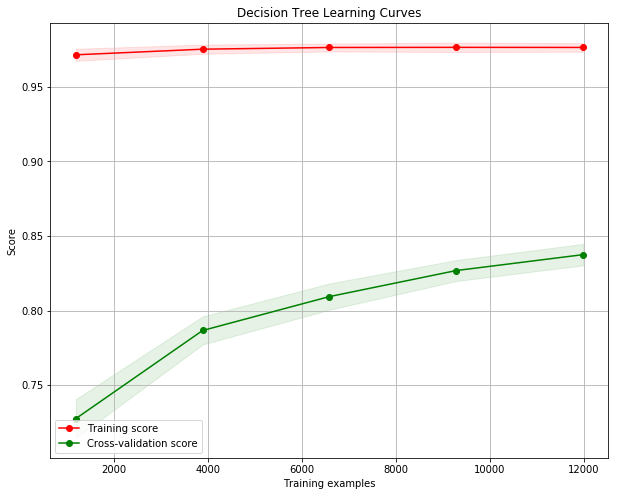

In [28]:
dt_title = 'Decision Tree Learning Curves'
dt_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(dt_gs, dt_title, x, y, cv=dt_cv, n_jobs=4, figsize=(10,8))

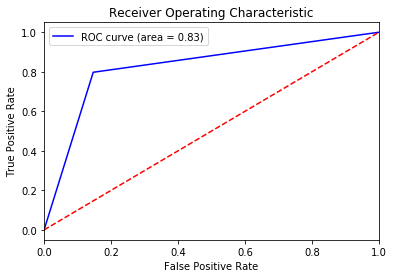

In [29]:
plot_roc_curve(y_test, dt_gs.predict(x_test))

In [21]:
confusion_matrix(y_test, dt_gs.predict(x_test))

array([[1087,  187],
       [ 197,  776]], dtype=int64)

# SVM

In [33]:
svm = SVC(random_state=24)

In [35]:
svm_params = {'C': [1, 0.9, 0.8],
              'kernel': ['linear', 'poly', 'rbf']}

In [36]:
svm_gs = GridSearchCV(svm, svm_params, cv=3, verbose=True, return_train_score=True, scoring='accuracy', n_jobs=4)

In [ ]:
svm_gs.fit(x_train, y_train.values.reshape(-1))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [237]:
svm_title = 'SVM Learning Curves'
svm_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(svm_gs, svm_title, x, y, cv=svm_cv, n_jobs=4, figsize=(10,8))

In [233]:
plot_roc_curve(y_test, svm_gs.predict(x_test))

array([1., 1., 1., ..., 1., 1., 1.])

In [216]:
confusion_matrix(y_test, svm_gs.predict(x_test))

array([[1087,  187],
       [ 197,  776]], dtype=int64)

# KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
knn_params = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2, 3]}

In [14]:
knn_gs = GridSearchCV(knn, knn_params, cv=3, verbose=True, return_train_score=True, scoring='accuracy', n_jobs=4)

In [15]:
knn_gs.fit(x_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  7.9min finished
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [ ]:
knn_title = 'KNN Learning Curves'
knn_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(knn_gs, knn_title, x, y, cv=knn_cv, n_jobs=4, figsize=(10,8))

In [ ]:
plot_roc_curve(y_test, knn_gs.predict(x_test))

In [16]:
confusion_matrix(y_test, knn_gs.predict(x_test))

array([[1239,   35],
       [  28,  945]], dtype=int64)

# NN

In [22]:
ann = MLPClassifier()

In [25]:
ann_params = {'hidden_layer_sizes': list(itertools.combinations_with_replacement([2**i for i in range(3, 8)], 2)),
              'activation': ['logistic', 'tanh', 'relu'],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [26]:
scaler = StandardScaler()

In [28]:
ann_gs = GridSearchCV(ann, ann_params, cv=3, verbose=True, return_train_score=True, scoring='accuracy', n_jobs=4)

In [29]:
ann_gs.fit(scaler.fit_transform(x_train), y_train.values.reshape(-1))

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   39.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 405 out of 405 | elapsed:  9.8min finished
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'hidden_layer_sizes': [(8, 8), (8, 16), (8, 32), (8, 64), (8, 128), (16, 16), (16, 32), (16, 64), (16, 128), (32, 32), (32, 64), (32, 128), (64, 64), (64, 128), (128, 128)], 'activation': ['logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'invscaling', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

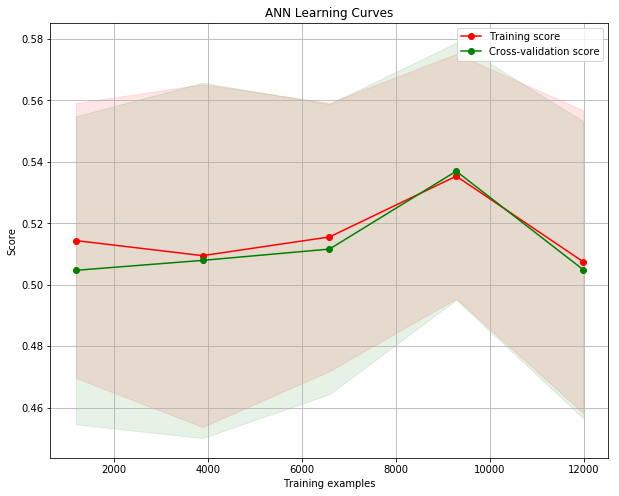

In [30]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann_gs.best_estimator_, ann_title, scaler.fit_transform(x), y, cv=ann_cv, n_jobs=4, figsize=(10,8))

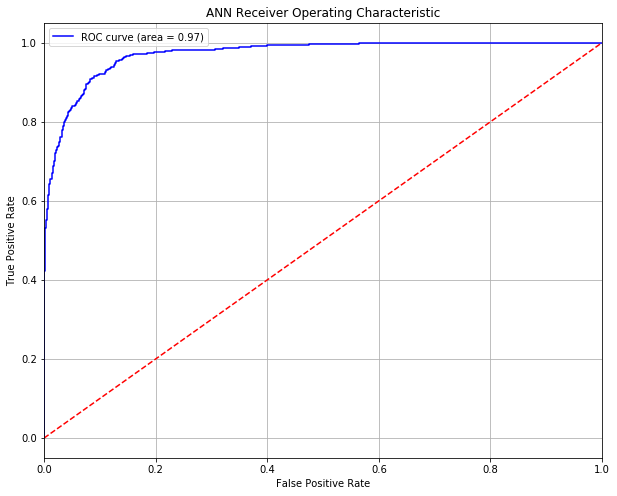

In [39]:
plot_roc_curve('ANN', y_test, ann_gs.best_estimator_.predict_proba(scaler.transform(x_test))[:, 1])

In [19]:
confusion_matrix(y_test, ann_gs.predict(x_test))

array([[1274,    0],
       [ 973,    0]], dtype=int64)

# Boosting

In [11]:
bst = GradientBoostingClassifier()

In [12]:
bst_params = {'loss': ['deviance', 'exponential'],
              'n_estimators': [10, 50, 100, 500],
              'subsample': [0.5, 0.75, 1.],
              'min_samples_split': [0.8, 0.9, 1.0]}

In [14]:
bst_gs = GridSearchCV(bst, bst_params, cv=3, verbose=True, return_train_score=True, scoring='accuracy', n_jobs=4)

In [15]:
bst_gs.fit(x_train, y_train.values.reshape(-1))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:   16.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'loss': ['deviance', 'exponential'], 'n_estimators': [10, 50, 100, 500], 'subsample': [0.5, 0.75, 1.0], 'min_samples_split': [0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

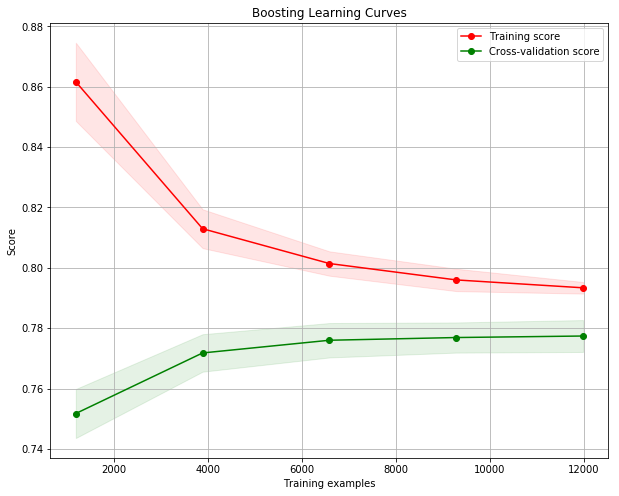

In [18]:
bst_title = 'Boosting Learning Curves'
bst_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(bst_gs, bst_title, x, y, cv=bst_cv, n_jobs=4, figsize=(10,8))

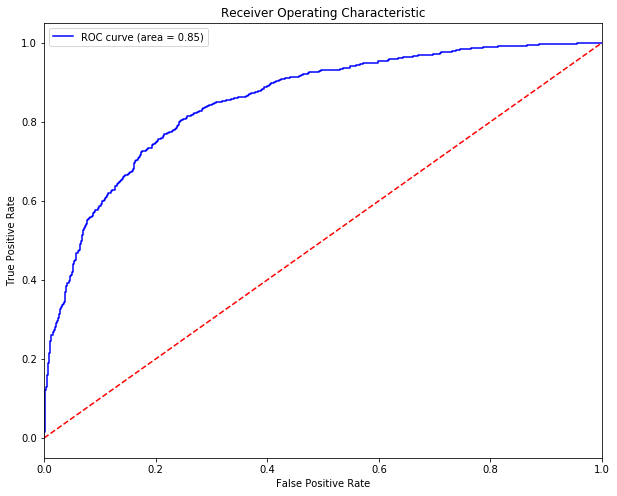

In [21]:
plot_roc_curve(y_test, bst_gs.best_estimator_.decision_function(x_test))

In [17]:
confusion_matrix(y_test, bst_gs.predict(x_test))

array([[1059,  215],
       [ 286,  687]], dtype=int64)